# DNN Cmab

try contextual bandits with a  shallow dnn and census data

In [1]:
#get data
import pandas as pd

adult_data = pd.read_csv('adult.csv', skipinitialspace = True)

adult_data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


What we will do now is keep:

```
['age', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country', 'income_bracket']
```

to say these are the attributes we have on a user in our data.

The scenario is one hwere we do not have the education level, and our ads are targeting that aspect. We have diff ads for differing levels of uedcation.

In [2]:
kept_cols = ['age', 'workclass', 'education', 'marital_status', 'occupation', \
             'relationship', 'race', 'sex', 'hours_per_week', 'native_country', 'income_bracket']

kept_data = adult_data[kept_cols].copy()

kept_data

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [3]:
import numpy as np

kept_data = kept_data.replace('?', np.nan).dropna()

kept_data

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [4]:
education_lvls = kept_data.education.unique()

education_lvls

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', '7th-8th', 'Doctorate', 'Assoc-voc', 'Prof-school',
       '5th-6th', '10th', 'Preschool', '12th', '1st-4th'], dtype=object)

In [5]:
education_dict = ({'Preschool':0,
                   '1st-4th':0,
                   '5th-6th':0,
                   '7th-8th':0,
                   '9th':1,
                   '10th':1,
                   '11th':1,
                   '12th':1,
                   'HS-grad':1,
                   'Some-college':2,
                   'Bachelors':2,
                   'Assoc-acdm':2,
                   'Assoc-voc':2,
                   'Prof-school':3,
                   'Masters':3,
                   'Doctorate':3})

kept_data.replace({'education': education_dict}, inplace=True)

kept_data

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income_bracket
0,39,State-gov,2,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,2,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,1,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,1,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,2,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,2,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,1,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,1,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,1,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [6]:
#encode categoricals
cat_cols = ['workclass', 'marital_status','occupation', 'relationship',\
            'race','sex','native_country','income_bracket']

education_y = kept_data.drop(cat_cols, axis = 1)

for col in cat_cols:
    temp_df = pd.get_dummies(kept_data[col], drop_first=True)
    education_y = pd.concat([temp_df, education_y], axis = 1)
    


education_y = education_y[[c for c in education_y if c not in ['education']]   + ['education']]
          
education_y

,>50K,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Widowed,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,age,hours_per_week,education
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,39,40,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,50,13,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,38,40,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,53,40,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,28,40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,27,38,2
32557,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,40,40,1
32558,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,58,40,1
32559,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,22,20,1


Simulate ad clicks by aying the prob of each group clicking on the corresponding ad

In [7]:
def get_ad_inventory():
    ad_inv_prob = {0:0.9, 1:0.7, 2:0.9, 3:0.8}
    ad_inventory = []
    for level, prob in ad_inv_prob.items():
        if np.random.uniform() < prob:
            ad_inventory.append(level)
            
        if not ad_inventory:
            ad_inventory = get_ad_inventory()
    return ad_inventory

def get_ad_click_probs():
    base_prob = 0.8
    delta = 0.25
    ed_lvls = {0:0.85, 1:0.7, 2:0.9, 3:0.8}
    
    ad_click_probs = ({l1: 
                       {l2: min( 0.90, round(max(0, ((np.random.rand()/2)-0.30) \
                                      + base_prob - delta * abs(ed_lvls[l1] - ed_lvls[l2])), 3))
                        for l2 in ed_lvls}
                       for l1 in ed_lvls})
    
    return ad_click_probs

def display_ad(ad_click_probs, user, ad):
    prob = ad_click_probs[ad][user['education']]
    click = 0
    if np.random.rand() < prob:
        click = 1
        
    return click
    
                      
                      
                                          

build shallow dnn

In [8]:
import tensorflow as tf

def huber_loss(y_true, y_pred):

    return tf.compat.v1.losses.huber_loss(y_true, y_pred)

def build_model(inputs, outputs, dropout, learning_rate = 0.01):
    #init sequential
    net = tf.keras.Sequential()
    
    net.add(tf.keras.layers.Dense(256, input_dim=inputs, activation='relu', 
                                  kernel_initializer='he_uniform'))
    if dropout > 0:
        net.add(tf.keras.layers.Dropout(dropout))
    net.add(tf.keras.layers.Dense(outputs, activation='sigmoid', kernel_initializer='he_uniform'))
    
    net.compile(optimizer=tf.optimizers.Adam(), loss=huber_loss)
    
    return net
                
def update_model(model, X, y):
    X = np.array(X)
    X = X.reshape((X.shape[0], X.shape[2]))
    y = np.array(y)
    model.fit(X,y, epochs = 10, verbose = 0)
    tf.keras.backend.clear_session() 
    return model

    

one hot representation for specified ad bsaed on ed lvl it targets

In [9]:
def ad_to_one_hot(ad):
    ed_lvls = [1,2,3,4]
    ad_input = [0] * len(ed_lvls)
    if ad in ed_lvls:
        ad_input[ed_lvls[ad]] = 1
    return ad_input


multi class classification to solve problem at hand

In [10]:
def select_ad(model, x):    
    preds = model.predict(x, verbose = 0)
    suggested_ad = np.argmax(preds)
    max_prob = np.max(preds)
    return suggested_ad, max_prob


generate userrs thru random selection from dataset

In [11]:
def generate_user(df):
    user = df.sample(1)
    context = user.iloc[:,:-1].values.tolist()[0]
    return user.to_dict(orient='records')[0], context
    

regret calcuation

In [12]:
def calc_regret(user, ad_inventory, ad_click_probs, ad_selected):
    this_p = 0
    max_p = 0
    for ad in ad_inventory:

        p = ad_click_probs[ad][user['education']]       

        if ad == ad_selected:
            this_p = p
            
        if p > max_p:
            max_p = p
            
    regret = max_p - this_p
    
    return regret


solving the ad problem

In [13]:
def solve_problem(df):
    #add in eps greedy and random to compare
    ad_click_probs = get_ad_click_probs()
    ad_inventory = [0,1,2,3]
    print(ad_click_probs)
    tracking = []
    dropout_levels = [0, 0.01, 0.05, 0.1, 0.2, 0.4, 'eps_greedy', 'random']
    init_eps = .95
    init_explore = 100
    
    for d in dropout_levels:
        init_model_train = init_explore
        total_regret = 0
        ad_input_n = df.education.unique()
        if d == 'eps_greedy':
            print("running epsilon greedy")
            label = 'e'
            ad_tracking = [0 for i in ad_inventory]
            ad_values = [0 for i in ad_inventory]
        elif d == 'random':
            print("running random")
            label = 'r'
        else:
            label = d
            tf.keras.backend.clear_session() 
            print("running dnn w/ dropout:", d)
            np.random.seed(0)
            context_n = df.shape[1] - 1            
            model = build_model(context_n, len(ad_input_n), d)
            X = []
            y = []
        
        for i in range(5000):
            # add in to make ads available totally random according to probs
            #ad_inventory = get_ad_inventory()
            user, context = generate_user(df)
            if i < init_explore:
                ad = np.random.choice(ad_inventory)
                
                if d != 'eps_greedy' and d != 'random':                
                    x = np.array(context).reshape((1, -1))
                
            else:
                if d == 'eps_greedy':
                    if np.random.rand() <= init_eps:
                        ad = np.argmax([(ad_values[i]/(max([1,ad_tracking[i]]))) for i in ad_inventory])
                    else:
                        ad = np.random.choice(ad_inventory)
                elif d == 'random':
                    ad = np.random.choice(ad_inventory)
                else:
                    x = np.array(context).reshape((1, -1))
                    ad, prob = select_ad(model, x)  
                                
            click = display_ad(ad_click_probs, user, ad) 
            if d == 'eps_greedy':                    
                ad_values[ad] += click
                ad_tracking[ad] += 1                
            regret = calc_regret(user, ad_inventory, ad_click_probs, ad)
            education = user['education']
            total_regret += regret
            
            if d != 'eps_greedy' and d != 'random':
                y_true = [0 for j in range(len(ad_input_n))]
                y_true[ad] = click
                X.append(x)
                y.append(y_true)
            
                if (i + 1) % init_model_train == 0:
                    print("total impressions:", i +1)
                    print("current regret:", total_regret)
                    print("model update")
                    model = update_model(model, X, y)
                    
                    #dont throw out all the data, keep the last half of what we have.
                    X = X[-init_model_train//2:]
                    y = y[-init_model_train//2:]
                    if init_model_train < 500:
                        init_model_train += init_model_train
                    else:
                        init_model_train = 500
            else:
                if (i + 1) % 500 == 0:
                    print("total impressions:", i +1)
                    print("current regret:", total_regret)
                    
            tracking.append([label, i, education, ad, click, regret, total_regret])
    
    cols =  ['dropout','impression_num','education','ad','click', 'regret', 'total_regret']
    tracking_df = pd.DataFrame(data = tracking, columns = cols)
             
    return tracking_df       

In [14]:
tracking_df = solve_problem(education_y)

{0: {0: 0.557, 1: 0.505, 2: 0.597, 3: 0.579}, 1: {0: 0.632, 1: 0.649, 2: 0.844, 3: 0.9}, 2: {0: 0.9, 1: 0.688, 2: 0.896, 3: 0.61}, 3: {0: 0.832, 1: 0.9, 2: 0.644, 3: 0.696}}
running dnn w/ dropout: 0
total impressions: 100
current regret: 17.031999999999996
model update
total impressions: 200
current regret: 30.75699999999997
model update
total impressions: 400
current regret: 59.53000000000012
model update
total impressions: 800
current regret: 115.67999999999975
model update
total impressions: 1000
current regret: 145.2110000000001
model update
total impressions: 1500
current regret: 215.158000000002
model update
total impressions: 2000
current regret: 283.5140000000039
model update
total impressions: 2500
current regret: 354.2660000000052
model update
total impressions: 3000
current regret: 423.34900000000675
model update
total impressions: 3500
current regret: 495.50000000000813
model update
total impressions: 4000
current regret: 567.1690000000003
model update
total impressions: 4

In [15]:
tracking_df

,dropout,impression_num,education,ad,click,regret,total_regret
0,0,0,1,2,0,0.212,0.212
1,0,1,2,3,1,0.252,0.464
2,0,2,1,0,0,0.395,0.859
3,0,3,2,2,1,0.000,0.859
4,0,4,2,1,1,0.052,0.911
...,...,...,...,...,...,...,...
39995,r,4995,2,1,1,0.052,920.252
39996,r,4996,3,2,0,0.290,920.542
39997,r,4997,3,1,1,0.000,920.542
39998,r,4998,1,3,1,0.000,920.542


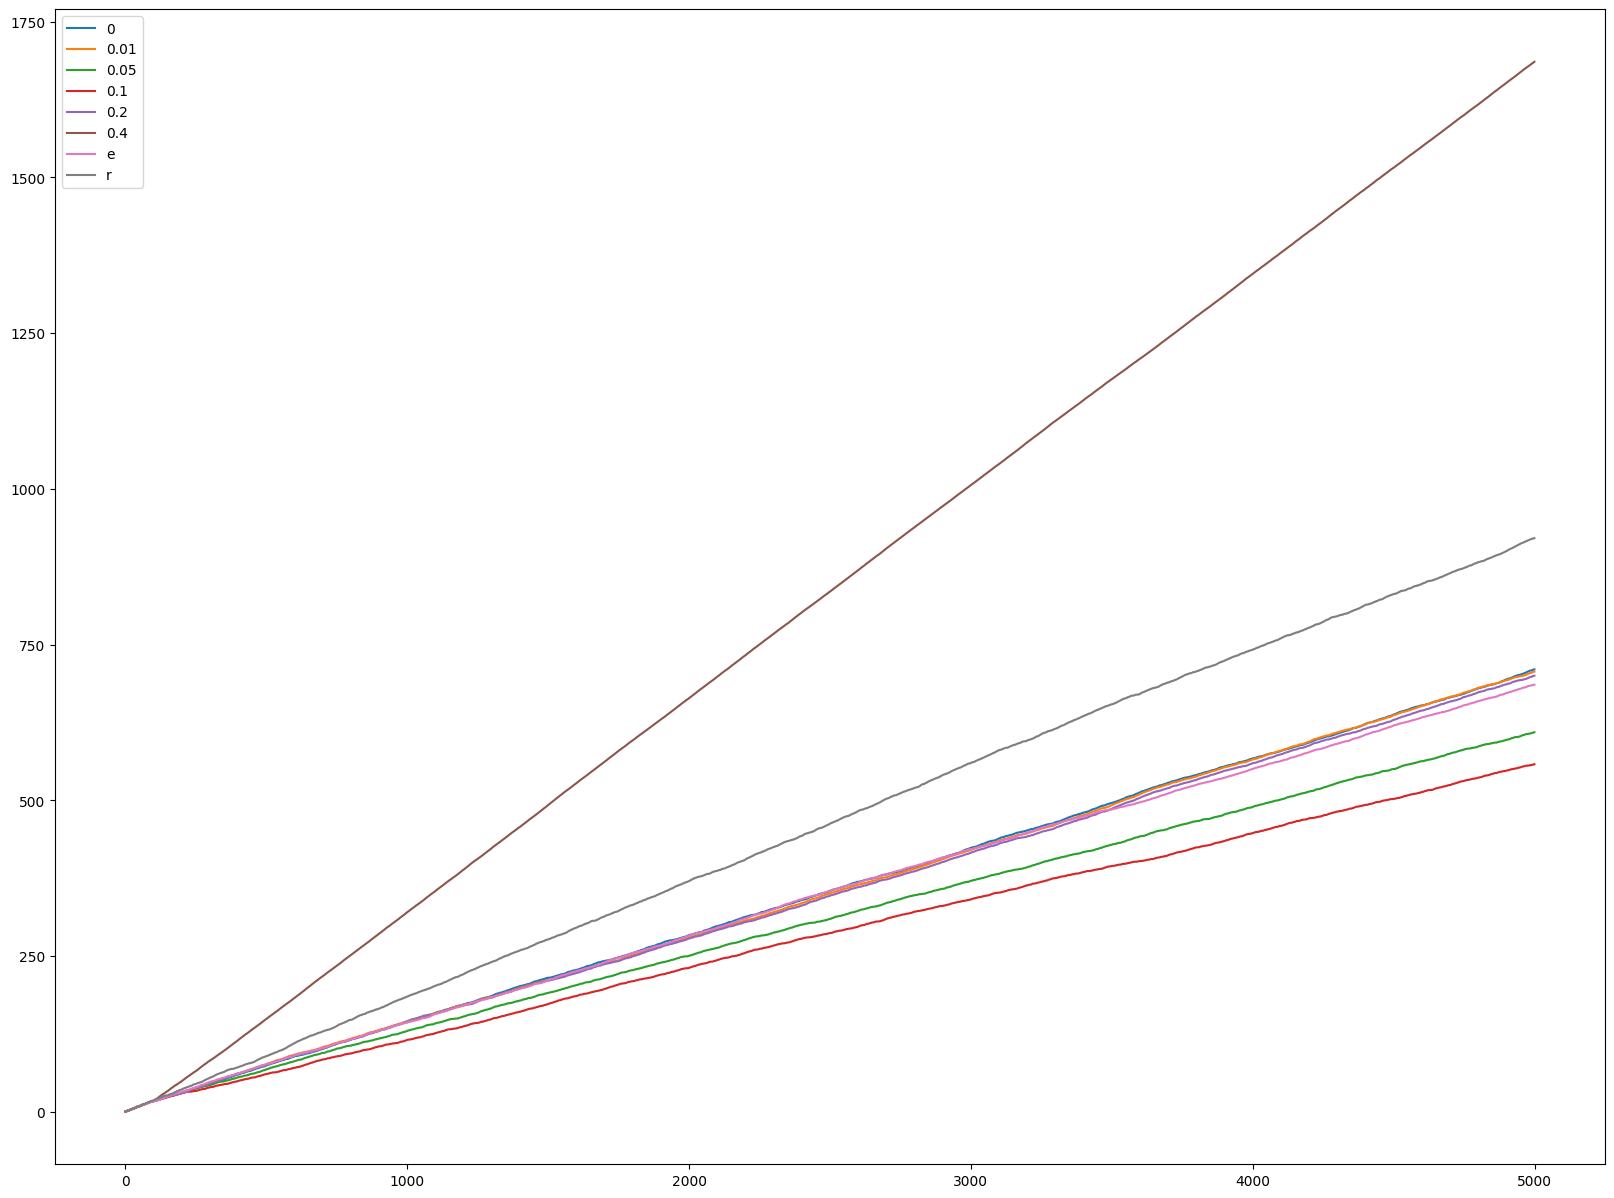

In [16]:
#review cumulative regret
import matplotlib.pyplot as plt
drops = tracking_df.dropout.unique()


plt.rcParams.update({'figure.figsize':[20,15]}) 

for i in range(len(drops)):
    w = i * 5000
    x = tracking_df[tracking_df['dropout'] == drops[i]]['impression_num']
    y = tracking_df[tracking_df['dropout'] == drops[i]]['total_regret']
    plt.plot(x, y, label = drops[i])

plt.legend(drops, loc='best')    

plt.show()

what we see is a multiclass prediction implementation of a dnn at drop out rate 0.05 or 0.1 performs the best to minimize regret.

drop out of 0.4 is the worst, random is the 2nd worse, while epsilon greedy performs somewhat on par with other drop out rates...